jupyter notebook to explore trends in product data

In [23]:
# Importing libararies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'data')
file_name = 'products_info.csv'
file_path = os.path.join(data_dir, file_name)

# Print to check the file path
print(file_path)

/Users/eshan23/eshanprashar_git_profile/kaggle_practice/L1_education/covid_edtech_usage/data/products_info.csv


In [5]:
# Read products csv file
df_products = pd.read_csv(file_path)

# Examine the data
print(f"Product data has {df_products.shape[0]} rows and {df_products.shape[1]} columns. Top 10 rows are:")
df_products.head(10)

Product data has 372 rows and 6 columns. Top 10 rows are:


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


In [69]:
# Examining unique values across product name company name, sector and primary essential function
# Renaming columns first according to convention
df_products.rename(columns={
    'LP ID': 'lp_id',
    'URL': 'url',
    'Product Name': 'product_name',
    'Provider/Company Name': 'company_name',
    'Sector(s)': 'sector',
    'Primary Essential Function': 'primary_function'
    }, inplace=True)

# Splitting the function based on first hyphen. We'll call the first part primary function and second part secondary function
if 'secondary_function' not in df_products.columns:
    try:
        df_products[['primary_function', 'secondary_function']] = df_products['primary_function'].str.split(' - ', n=1, expand=True)
    except:
        print("Already split into primary and secondary functions")
    
if 'tertiary_function' not in df_products.columns: # check presence of hyphen in every row
    for index, row in df_products.iterrows():
        print(index, row['secondary_function'])
        if '-' in row['secondary_function']:
            parts = row['secondary_function'].split(' - ', 1)
            df_products.at[index, 'secondary_function'] = parts[0]
            df_products.at[index, 'tertiary_function'] = parts[1]
        else:
            df_products.at[index,'tertiary_function'] = row['secondary_function']

# Examine the dataset
df_products.head(10)

,lp_id,url,product_name,company_name,sector,primary_function,secondary_function,tertiary_function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference",Games & Simulations
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC,Courseware & Textbooks,Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC,Study Tools,Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference",Streaming Services


In [33]:
# Exploring value_counts for sector
df_products['sector'].value_counts()

sector
PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: count, dtype: int64

In [74]:
# Exploring primary and secondary functions
function_counts = df_products.groupby(['sector','primary_function','secondary_function', 'tertiary_function']).size().reset_index(name='product_counts')

# Add a column that displays % of total product_counts
total_products = function_counts['product_counts'].sum()
function_counts['product_percentage'] = ((function_counts['product_counts'] / total_products) * 100).round(2)
function_counts.sort_values(by='product_percentage', ascending=False, inplace=True)
function_counts['product_cumsum_percentage'] = (function_counts['product_percentage']).cumsum().round(2)
function_counts.head(20)

,sector,primary_function,secondary_function,tertiary_function,product_counts,product_percentage,product_cumsum_percentage
4,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms,13,21.31,21.31
15,PreK-12; Higher Ed,LC,Study Tools,Study Tools,5,8.20,29.51
28,PreK-12; Higher Ed; Corporate,LC/CM/SDO,Other,Other,4,6.56,36.07
6,PreK-12,LC,"Sites, Resources & Reference","Sites, Resources & Reference",3,4.92,40.99
24,PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference","Sites, Resources & Reference",3,4.92,45.91
0,PreK-12,CM,Classroom Engagement & Instruction,Classroom Management,3,4.92,50.83
18,PreK-12; Higher Ed; Corporate,CM,Classroom Engagement & Instruction,Communication & Messaging,2,3.28,54.11
2,PreK-12,LC,Content Creation & Curation,Content Creation & Curation,2,3.28,57.39
27,PreK-12; Higher Ed; Corporate,LC,Study Tools,Study Tools,2,3.28,60.67
26,PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference",Thesaurus & Dictionary,2,3.28,63.95


In [27]:
# Creating a visual to plot products per company split into sectors
# Aggregate data to get the count of products by company
product_counts = df_products.groupby(['company_name','sector']).size().reset_index(name='product_count')
top_product_counts = product_counts.sort_values(by='product_count', ascending=False).head(10)
top_product_counts

,company_name,sector,product_count
99,Google LLC,PreK-12; Higher Ed; Corporate,23
132,Learning A-Z,PreK-12,4
78,"ExploreLearning, LLC",PreK-12,3
48,Curriculum Associates,PreK-12,3
113,IXL Learning,PreK-12,3
107,Houghton Mifflin Harcourt,PreK-12,3
206,Savvas Learning Company | Formerly Pearson K12...,PreK-12,3
208,Scholastic Inc,PreK-12,3
242,The College Board,PreK-12,3
158,Microsoft,PreK-12; Higher Ed; Corporate,3


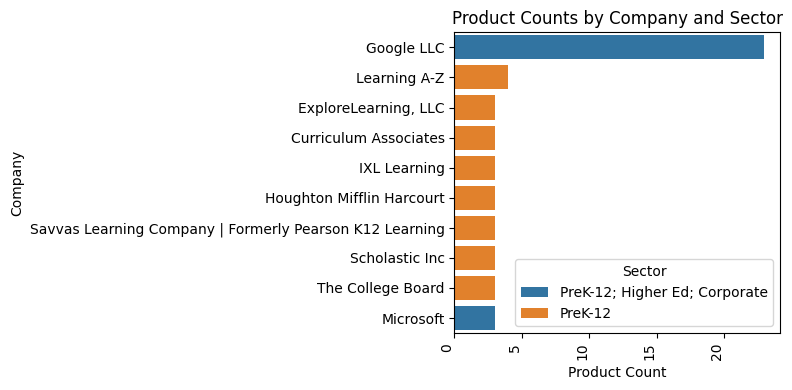

In [32]:
# Plotting the distribution of products by company and sector
plt.close()
plt.figure(figsize=(8,4))
sns.barplot(y='company_name', x='product_count', hue='sector', data=top_product_counts)

# Customize the plot
plt.title('Product Counts by Company and Sector')
plt.xlabel('Product Count')
plt.ylabel('Company')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sector')
plt.tight_layout()
plt.show()